# B SF Permits Exploration
_6 points_

- Explore the data. Which columns correlate strongly with the "Current Status" column? How do other columns correlate to each other? 
- Describe problems with "Current Status" as a target column to predict. Can you construct a better target column?

## Import libraries and load data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
# read in the San Francisco building permits data
sfPermits = pd.read_csv("./clear_permits_group6_nr_A.csv")

# set seed for reproducibility
np.random.seed(0)
pd.options.display.max_columns = 200  # show all columns of this dataset when
#providing samples
sfPermits.head(25)

,Unnamed: 0,Permit Type,Current Status,Number of Existing Stories,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month,Number of Existing Stories_was_missing,Estimated Cost_was_missing,Revised Cost_was_missing,Existing Use_was_missing,Existing Units_was_missing,Plansets_was_missing,Existing Construction Type_was_missing,Supervisor District_was_missing,Neighborhoods - Analysis Boundaries_was_missing,Zipcode_was_missing,Issued Year_was_missing,Issued Day_was_missing,Issued Month_was_missing,First Construction Document Year_was_missing,First Construction Document Day_was_missing,First Construction Document Month_was_missing,Permit Expiration Year_was_missing,Permit Expiration Day_was_missing,Permit Expiration Month_was_missing
0,0,4,expired,6.000000,4000.000000,4000.000000,tourist hotel/motel,143.000000,2.0,3.0,3.0,Tenderloin,94102.0,2015,6,5,2017,21,12,2015,6,5,2015.000000,9.000000,11.000000,2015.000000,9.000000,11.000000,2016.000000,3.000000,11.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,4,issued,7.000000,1.000000,500.000000,tourist hotel/motel,15.666164,2.0,3.0,3.0,Tenderloin,94102.0,2016,19,4,2017,3,8,2016,19,4,2017.000000,3.000000,8.000000,2017.000000,3.000000,8.000000,2017.000000,3.000000,12.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,3,withdrawn,6.000000,20000.000000,132856.186492,retail sales,39.000000,2.0,1.0,3.0,Russian Hill,94109.0,2016,27,5,2017,26,9,2016,27,5,2015.177495,15.719151,6.439867,2015.182252,15.701404,6.448438,2016.332207,15.594048,6.125173,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
3,3,8,complete,2.000000,2000.000000,2000.000000,1 family dwelling,1.000000,2.0,5.0,3.0,Nob Hill,94109.0,2016,7,11,2017,24,7,2016,7,11,2017.000000,18.000000,7.000000,2017.000000,18.000000,7.000000,2018.000000,13.000000,7.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,6,issued,3.000000,100000.000000,100000.000000,retail sales,15.666164,2.0,3.0,6.0,Tenderloin,94102.0,2016,28,11,2017,1,12,2016,28,11,2017.000000,1.000000,12.000000,2017.000000,20.000000,11.000000,2018.000000,1.000000,12.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,8,issued,5.000000,4000.000000,4000.000000,apartments,326.000000,2.0,1.0,10.0,Potrero Hill,94107.0,2017,14,6,2017,6,7,2017,14,6,2017.000000,6.000000,7.000000,2017.000000,6.000000,7.000000,2018.000000,1.000000,7.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,6,8,complete,3.000000,12000.000000,12000.000000,apartments,5.000000,0.0,5.0,5.0,Inner Sunset,94122.0,2017,30,6,2017,12,7,2017,30,6,2017.000000,30.000000,6.000000,2017.000000,30.000000,6.000000,2018.000000,25.000000,6.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,7,8,issued,5.705773,168955.443297,0.000000,1 family dwelling,15.666164,2.0,5.0,10.0,Bayview Hunters Point,94124.0,2017,30,6,2017,30,6,2017,30,6,2017.000000,30.000000,6.000000,2017.000000,30.000000,6.000000,2016.332207,15.594048,6.125173,True,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True
8,8,8,issued,5.705773,168955.443297,1.000000,1 family dwelling,15.666164,2.0,5.0,5.0

In [2]:
sfPermits.drop("Unnamed: 0", axis=1, inplace=True)
sfPermits.head(25)

,Permit Type,Current Status,Number of Existing Stories,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month,Number of Existing Stories_was_missing,Estimated Cost_was_missing,Revised Cost_was_missing,Existing Use_was_missing,Existing Units_was_missing,Plansets_was_missing,Existing Construction Type_was_missing,Supervisor District_was_missing,Neighborhoods - Analysis Boundaries_was_missing,Zipcode_was_missing,Issued Year_was_missing,Issued Day_was_missing,Issued Month_was_missing,First Construction Document Year_was_missing,First Construction Document Day_was_missing,First Construction Document Month_was_missing,Permit Expiration Year_was_missing,Permit Expiration Day_was_missing,Permit Expiration Month_was_missing
0,4,expired,6.000000,4000.000000,4000.000000,tourist hotel/motel,143.000000,2.0,3.0,3.0,Tenderloin,94102.0,2015,6,5,2017,21,12,2015,6,5,2015.000000,9.000000,11.000000,2015.000000,9.000000,11.000000,2016.000000,3.000000,11.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4,issued,7.000000,1.000000,500.000000,tourist hotel/motel,15.666164,2.0,3.0,3.0,Tenderloin,94102.0,2016,19,4,2017,3,8,2016,19,4,2017.000000,3.000000,8.000000,2017.000000,3.000000,8.000000,2017.000000,3.000000,12.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,withdrawn,6.000000,20000.000000,132856.186492,retail sales,39.000000,2.0,1.0,3.0,Russian Hill,94109.0,2016,27,5,2017,26,9,2016,27,5,2015.177495,15.719151,6.439867,2015.182252,15.701404,6.448438,2016.332207,15.594048,6.125173,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
3,8,complete,2.000000,2000.000000,2000.000000,1 family dwelling,1.000000,2.0,5.0,3.0,Nob Hill,94109.0,2016,7,11,2017,24,7,2016,7,11,2017.000000,18.000000,7.000000,2017.000000,18.000000,7.000000,2018.000000,13.000000,7.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6,issued,3.000000,100000.000000,100000.000000,retail sales,15.666164,2.0,3.0,6.0,Tenderloin,94102.0,2016,28,11,2017,1,12,2016,28,11,2017.000000,1.000000,12.000000,2017.000000,20.000000,11.000000,2018.000000,1.000000,12.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,8,issued,5.000000,4000.000000,4000.000000,apartments,326.000000,2.0,1.0,10.0,Potrero Hill,94107.0,2017,14,6,2017,6,7,2017,14,6,2017.000000,6.000000,7.000000,2017.000000,6.000000,7.000000,2018.000000,1.000000,7.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,8,complete,3.000000,12000.000000,12000.000000,apartments,5.000000,0.0,5.0,5.0,Inner Sunset,94122.0,2017,30,6,2017,12,7,2017,30,6,2017.000000,30.000000,6.000000,2017.000000,30.000000,6.000000,2018.000000,25.000000,6.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,8,issued,5.705773,168955.443297,0.000000,1 family dwelling,15.666164,2.0,5.0,10.0,Bayview Hunters Point,94124.0,2017,30,6,2017,30,6,2017,30,6,2017.000000,30.000000,6.000000,2017.000000,30.000000,6.000000,2016.332207,15.594048,6.125173,True,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True
8,8,issued,5.705773,168955.443297,1.000000,1 family dwelling,15.666164,2.0,5.0,5.0,Lone Mountain/USF,94117.0,20

## Adapt column "change status"

In [3]:
sfPermits['Current Status'].value_counts()

complete       97077
issued         83559
filed          12043
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
appeal             2
disapproved        2
incomplete         2
Name: Current Status, dtype: int64

in order to show correlations betwee current status and any other columns, we need "current status" to be a numerical variable, since this allows us to plot a barplot. We therefore divide it into the most basic 2 categories, which are: 
- a) permitted
- b) not (yet) permitted
assigning value 1 to "permitted" and value 0 to "not (yet) permitted"



In [4]:
permitted = ['approved', 
    'issued', 
    'complete',
    'expired']#well this one is tricky. But it means that in the past it'd been permitted. 
            #depends a bit on what we do this for. Since we don't have "real" context in our task, 
            #it's difficult to assign "Expired"

not_yet_permitted = [
    'appeal', 
    'plancheck', 
    'suspend', 
    'reinstated', 
    'filed',
    'disapproved',
    'incomplete',
    'revoked',
    'cancelled',
    'withdrawn'
]
for i in permitted:
    sfPermits['Current Status'].replace(to_replace=i, value='1', inplace=True)
    

In [5]:
for i in not_yet_permitted:
    sfPermits['Current Status'].replace(to_replace=i, value='0', inplace=True)

In [6]:
sfPermits['Current Status'].value_counts()

1    182739
0     16161
Name: Current Status, dtype: int64

In [7]:

sfPermits['Current Status'] = pd.to_numeric(sfPermits['Current Status'])

In [8]:
1-(17531/181369)

0.9033407032072736

as we see, by far most of the applications were permitted (around 90 %).

## discover correlations to "Current status" in its adapted form: 

In [9]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

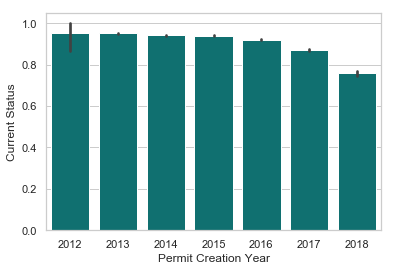

In [10]:
sns.barplot('Permit Creation Year', 'Current Status', data=sfPermits, color="teal")
plt.show()

#### we see a slight correlation between the permit creation year and the status. The longer in the past the permit has been created, the higher the probabaility that it'd been accepted. 

In [11]:
len(sfPermits['Neighborhoods - Analysis Boundaries'].unique())

41

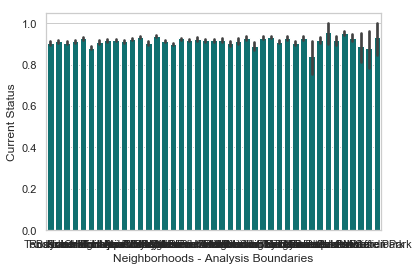

In [12]:
# 41 is still an acceptable amount of categories, so: 
sns.barplot('Neighborhoods - Analysis Boundaries', 'Current Status', data=sfPermits, color="teal")
plt.show()

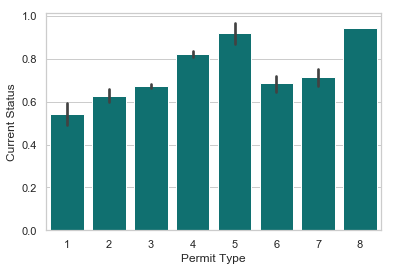

In [13]:
sns.barplot('Permit Type', 'Current Status', data=sfPermits, color="teal")
plt.show()

this is the biggest correlation. The type of permit has a clear impact on its probability of success. 

#### there are differences depending on the neighborhood, but they are relatively small. 

#### in general we think it's rather difficult to find very good correlations as the current status is in the by far most occurences "permitted". Hence, the barplots tend to look all the same. 


## discover correlations between other columns:

In [15]:
# categorical-categorical: 
sns.stripplot('Permit Creation Year', "Issued Year", data= sfPermits)

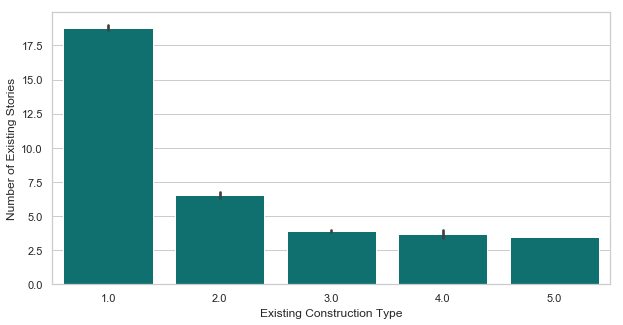

In [18]:
#although we don't exactly know what is behind the "construction type", we suppose there is a correlation between the "type of building" 
# and the number of stories the building has. 
plt.figure(figsize=(10,5))
sns.barplot('Existing Construction Type', 'Number of Existing Stories', data= sfPermits, color="teal")
plt.show()


#### there is a strong correlation, at least regarding the first category. Seems like  there's a single category for all taller buildings/ skyscrapers...

# C SF Permits Prediction
_6 points_
- Predict the "Current Status" or your substitute column from B from the other columns.
- Drop unessecary columns
- Construct one-hot encoded dummy columns
- Choose the Predictor of your choice

our approach to it: 
we already have dropped "unnecesary" (for our purpose) columns in A. 
we altered "current status" and put it into categories. 
Now: 
### One Hot Encoding
one hot encoding for everything except for the following columns: 
Permitted, Number of Existing Stories, Revised Cost, Existing Units  -> would cause too many columns otherwise...

In [27]:
sfPermits.drop(['Current Status', 'Number of Existing Stories', 'Revised Cost', 'Existing Units'],axis=1).columns

Index(['Permit Type', 'Estimated Cost', 'Existing Use', 'Plansets',
       'Existing Construction Type', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Permit Creation Year', 'Permit Creation Day', 'Permit Creation Month',
       'Current Status Year', 'Current Status Day', 'Current Status Month',
       'Filed Year', 'Filed Day', 'Filed Month', 'Issued Year', 'Issued Day',
       'Issued Month', 'First Construction Document Year',
       'First Construction Document Day', 'First Construction Document Month',
       'Permit Expiration Year', 'Permit Expiration Day',
       'Permit Expiration Month', 'Number of Existing Stories_was_missing',
       'Estimated Cost_was_missing', 'Revised Cost_was_missing',
       'Existing Use_was_missing', 'Existing Units_was_missing',
       'Plansets_was_missing', 'Existing Construction Type_was_missing',
       'Supervisor District_was_missing',
       'Neighborhoods - Analysis Boundaries_was_missing',
       

In [30]:
# now the one hot encoding (ignore the "xyz_was_missing"-columns): 
columns_for_onehot = [
    'Permit Type', 'Existing Use', 'Plansets',
       'Existing Construction Type', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Permit Creation Year', 'Permit Creation Day', 'Permit Creation Month',
       'Current Status Year', 'Current Status Day', 'Current Status Month',
       'Filed Year', 'Filed Day', 'Filed Month', 'Issued Year', 'Issued Day',
       'Issued Month', 'First Construction Document Year',
       'First Construction Document Day', 'First Construction Document Month',
       'Permit Expiration Year', 'Permit Expiration Day',
       'Permit Expiration Month'
]

In [31]:
sfPermits = pd.get_dummies(sfPermits, columns=columns_for_onehot)
sfPermits.shape #will have many more columns

(198900, 528)

### predict current status by using kBest: 

In [32]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [33]:
#X: everything except for "current status"
X = sfPermits.drop('Current Status', axis=1)
#target column Current Status (what we want to predict)
Y = sfPermits['Current Status']

In [34]:
kbest = SelectKBest(k = 50)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
kbest.fit(X_train, y_train)
X_t_train = kbest.transform(X_train)
X_t_test = kbest.transform(X_test)

C:\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 48  88 129 130] are constant.
  UserWarning)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [35]:
clf = LinearSVC(verbose=1)
clf.fit(X_t_train, y_train)
y_pred = clf.predict(X_t_test)

[LibLinear]

In [36]:
#measure our achieved accuracy: 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9861069214010391


# with our modified data and kBest we are able to predict the current status of a permit (whether it was permitted[in any kind of form] or denied[in any kind of form] with an accuracy of 98.61 %  ---> we are happy with that accuracy and leave the model like it is and don't change any proportion of test/train data...